Done by TAR
- Tigist Wondimneh- UGR/2538/12
- Abdulkarim Getachew - UGR/7992/12
- Rediet Ferew - UGR/1415/12

AI Stream

#**Introduction**

We have chosen a dataset from kaggle. The dataset contaains the informations of people who have been prone to Acute Heart Disease(AHD). The dataset contains 303 observations and 14 features. 



In [ ]:
from google.colab import drive
drive.mount("./drive")

# importing the necessary libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_auc_score,roc_curve

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


In [ ]:
class PreProcessing:
  def splitting(self,data, label):
    x_train, x_test, y_train, y_test = train_test_split(data, label, test_size = 0.2)
    return x_train, x_test, y_train, y_test

In [ ]:
# from scrarch attempt in implemeting the logistics regression
# has a lower accuracy compared the the built in library

class Logistic:
    def __init__(self):
        self.weights = None
        self.bias = 0

    def sigmoid(self,z):
        return 1/(1 + np.exp(-z))

    def cost(self, X, y, y_hat):
        m = X.shape[0]
        vals = (y_hat - y)
        dw = (1/m)*np.dot(X.T, vals)
        db = (1/m)*np.sum((y_hat - y)) 
        return dw, db

    def train(self, X, y, epochs, lr): 
        m, n = X.shape
        w = np.zeros((n,1))
        b = 0
        y = y.to_numpy()
        y = y.reshape(m,1)
        
        for epoch in range(epochs):
            dott  = np.dot(X, w)
            y_hat = self.sigmoid(dott + b)
            dw, db = self.cost(X, y, y_hat)
            w -= lr*dw
            b -= lr*db
        self.weights = w
        self.bias = b
        return w, b
    
    def predict(self,X):
        preds = self.sigmoid(np.dot(X, self.weights) + self.bias)
        pred_class = []
        pred_class = [1 if i > 0.5 else 0 for i in preds]
        return np.array(pred_class)

    def accuracy(self, y, y_hat):
      accuracy = np.sum(y == y_hat) / len(y)
      return accuracy



#**Data Preprocessing**

Here we are loading the dataset and cating it as a pandas dataframe type. As well as scaling and normalizing our datasets and finally splitting it for training and testing.

In [ ]:
# path and filename of the the specified dataset
# please specify the "relative path of the file according to your naming of directories"

path= "/content"
file_name = "heart_disease.csv.txt"

# reading th csv file of the dataset
data = pd.read_csv(os.path.join(path, file_name))
data.head(20)





,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,No
7,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,Yes
8,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal,No
9,63,1,asymptomatic,130,254,0,2,147,0,1.4,2,1.0,reversable,Yes
10,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0.0,reversable,Yes


In [ ]:
# dropping some of the data features because of null values as well as features whose values are categorical and cannot be quantified
data.dropna(axis='index', subset=['Ca', 'Thal'], inplace=True)
data = data.loc[:, ~data.columns.isin(['Sex', 'ChestPain', 'Thal', np.nan, np.inf])].copy()

# replacing the categorical classes into numerical values 
data['AHD'].replace(['No','Yes'],[0,1],inplace=True)
data = data.astype({'AHD': 'int'})




#**Data visulaization**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

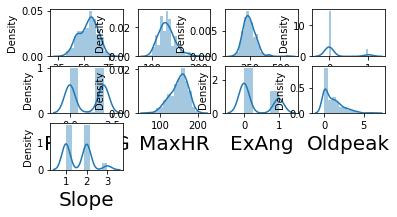

In [ ]:
# checking the disstributions of the data features
num = 1
for column in data.columns:
    if num < 10 : ## 14 columns in data 
        plt.subplot(4,4,num) ## 4 : rows , 4: columns , plotnumber : position of plot
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    num+=1
plt.show()

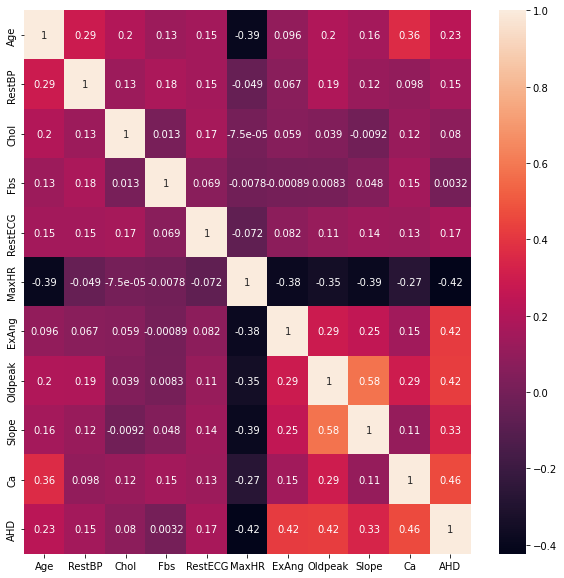

In [ ]:
#correlation of the data features using heatmap
plt.figure(figsize=(10,10), facecolor='white')
corrletion_matrix= data.corr()
sns.heatmap(corrletion_matrix,annot=True)

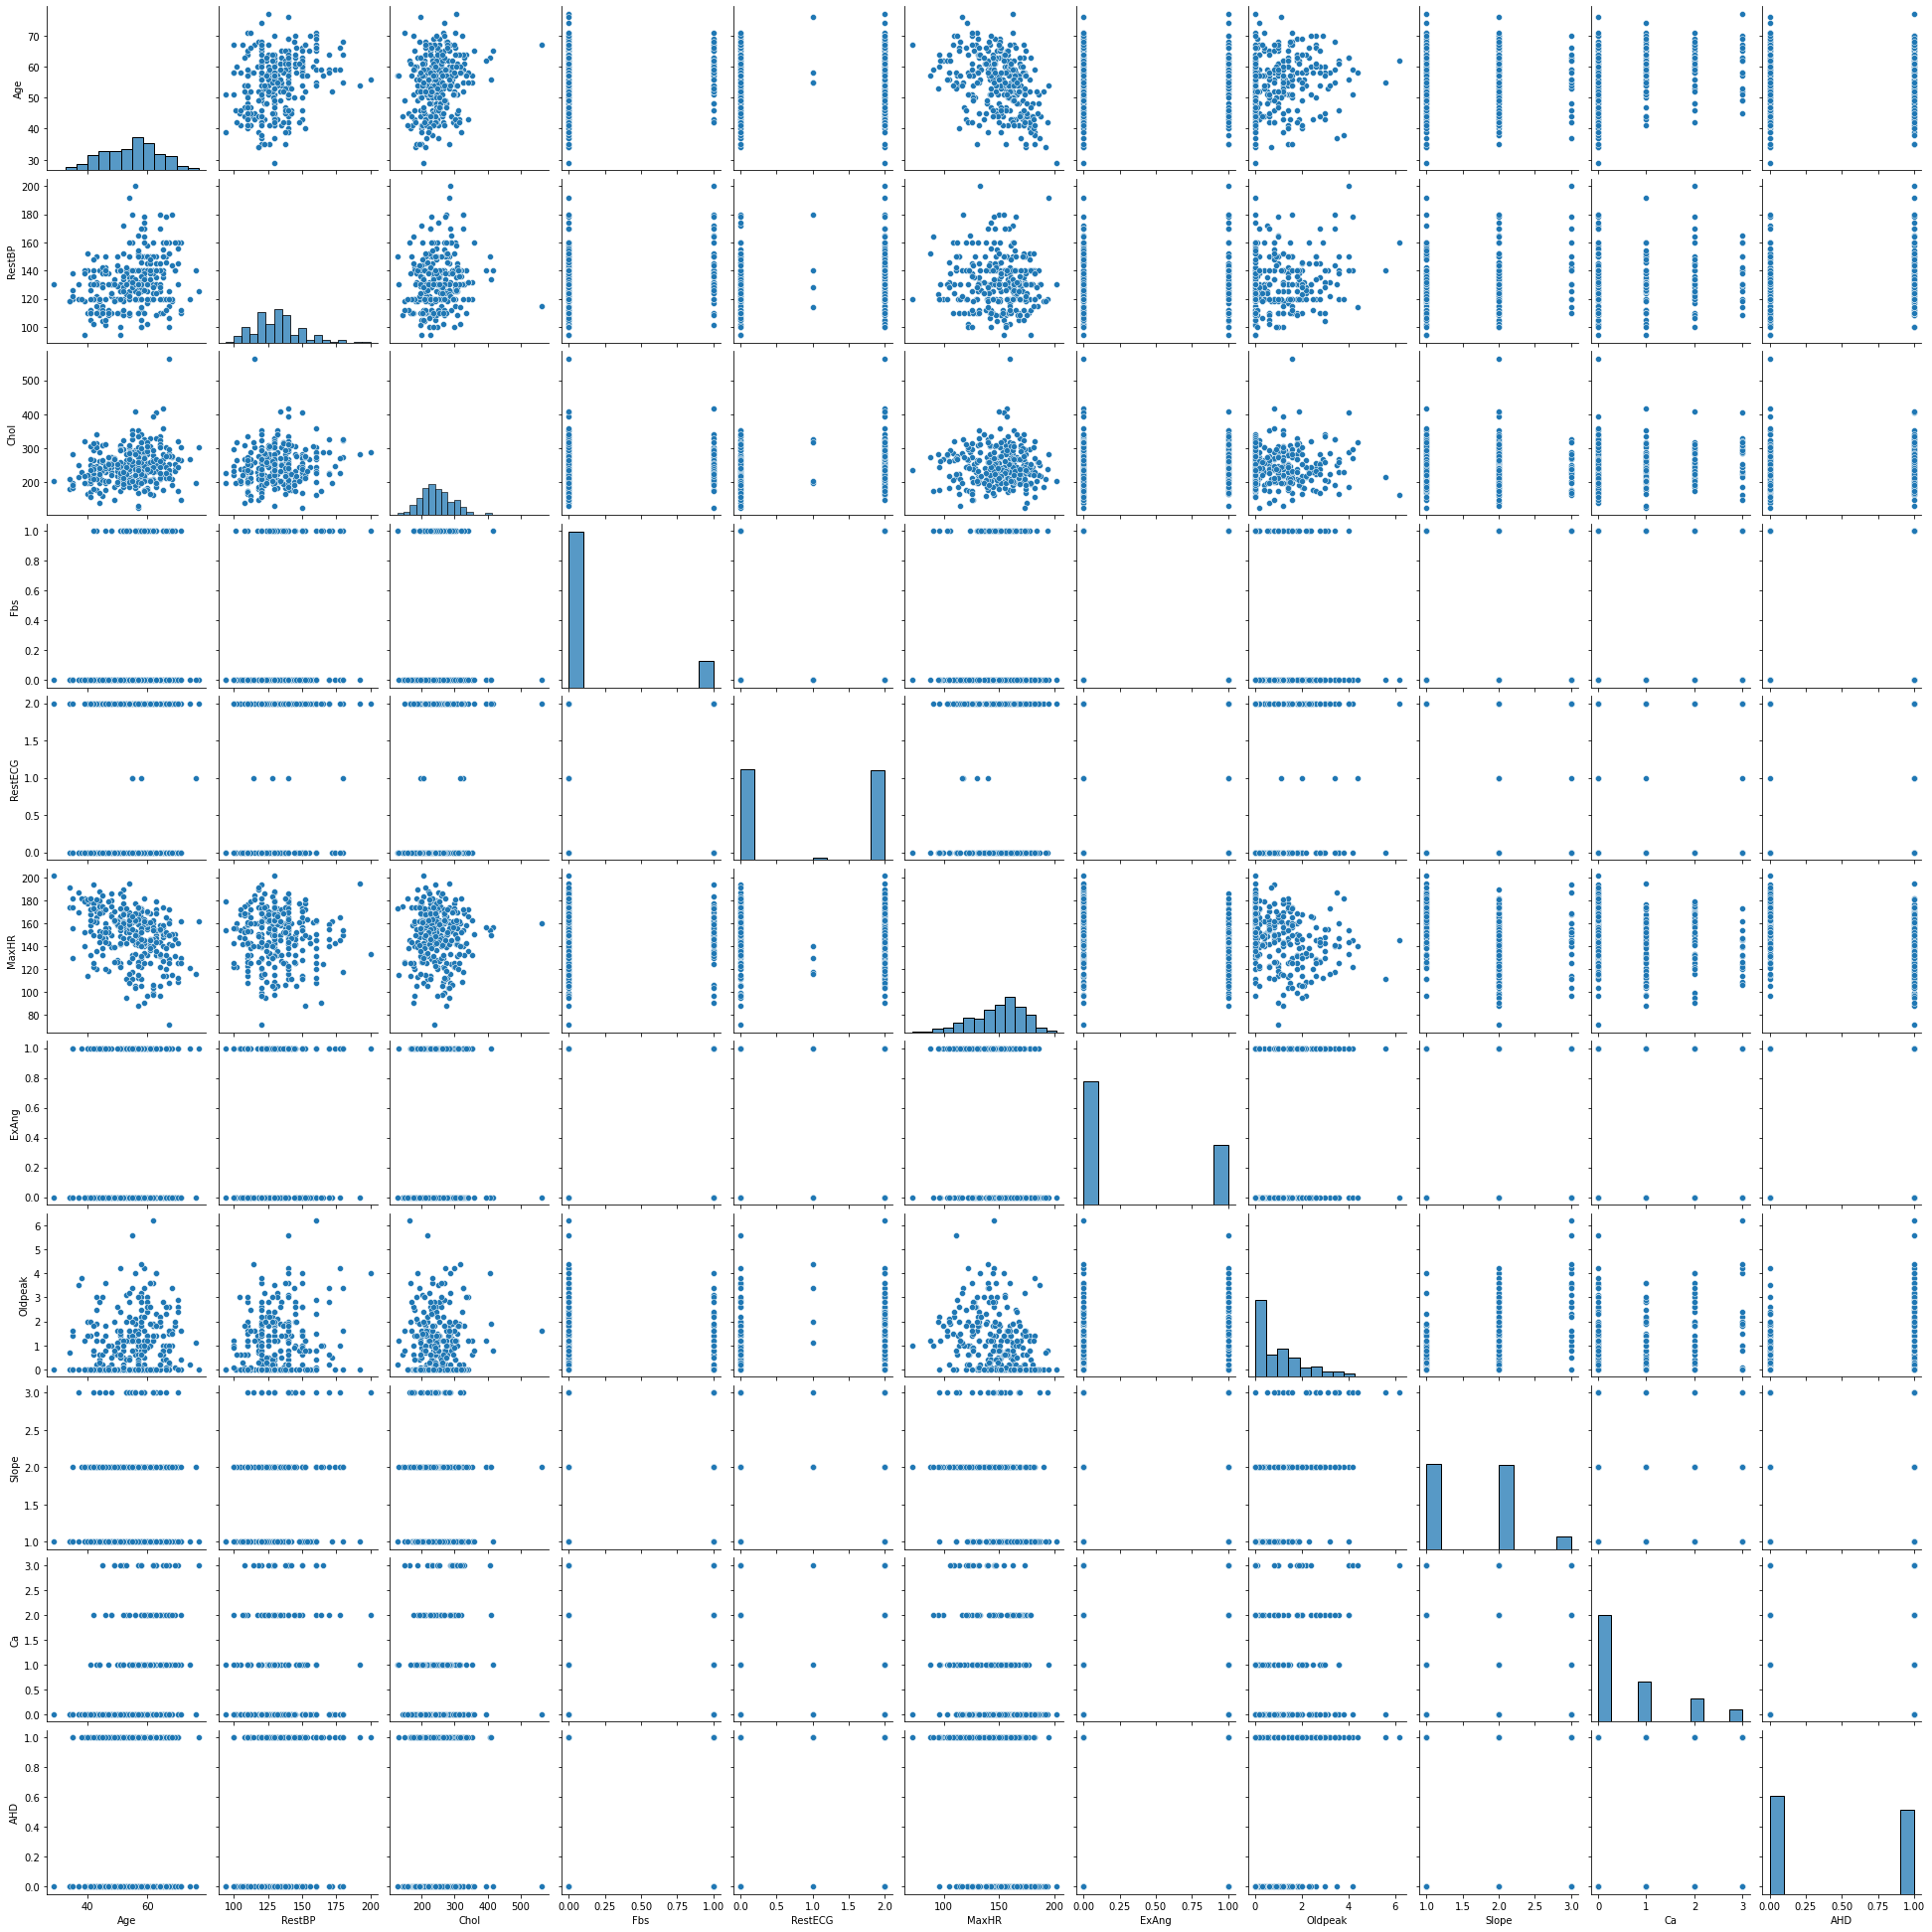

In [ ]:
# this is the relationship of features with each other scatter pair plot
sns.pairplot(data)

In [ ]:
# the label is the extracted from the dataset in the AHD column
label = data.pop('AHD')

In [ ]:
# checking if there is any null value in the dataset
np.any(np.isnan(data))

False

In [ ]:
# scaling the dataset using stac=ndard scaler and normalizing as cleaning th data
fit = StandardScaler()
X = fit.fit_transform(np.array(data, dtype = float))

# splitting the data into training dataset and testing dataset
prePro = PreProcessing()
x_train, x_test, y_train, y_test = prePro.splitting(X, label)

#**Model Training**

Here we have used both the scratch implementation as well as the library in the python module. 

In [ ]:
#scratch model
#initializing and training the mode
obj1 = Logistic()
model = obj1.train(x_train,y_train,500, 0.001)
y_pred = obj1.predict(x_test)
y_train = obj1.predict(x_train)
acc = obj1.accuracy(y_test, y_pred)
print(acc)


0.75


In [ ]:
# initializing the LogisticRegression and fitting the dataset onto it to train a model
log_reg_model = LogisticRegression()
log_reg_model.fit(x_train, y_train)

# making predictions of the test dataset and displaying some accuracy measurement techniques
preds = log_reg_model.predict(x_test)
print(metrics.accuracy_score(y_test, preds))
print(metrics.confusion_matrix(y_test, preds))
print(metrics.classification_report(y_test, preds))



0.75
[[26  6]
 [ 9 19]]
              precision    recall  f1-score   support

           0       0.74      0.81      0.78        32
           1       0.76      0.68      0.72        28

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60



#**Visualizations**

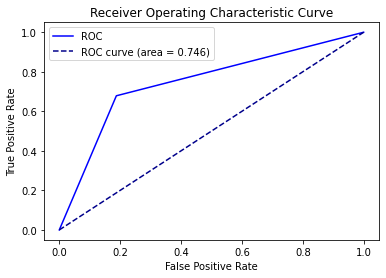

In [ ]:
auc_score = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='blue', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.3f)' % auc_score)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()